<a href="https://colab.research.google.com/github/ajayyy17/demo/blob/main/IndianAutomobileBuyingBehaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

Importing the datesets

In [2]:
df = pd.read_csv('/content/Indian automoble buying behavour study 1.0.csv')

In [3]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [5]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [6]:
df_raw= df.copy()

In [7]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [8]:
df[["Salary"	,"Wife Salary",	"Total Salary",'Price']] =df[["Salary"	,"Wife Salary",	"Total Salary",'Price']]/100000

In [9]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,8.0,0.0,8.0,i20,8.0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,14.0,6.0,20.0,Ciaz,10.0
2,45,Business,Married,Graduate,4,Yes,Yes,No,18.0,0.0,18.0,Duster,12.0
3,41,Business,Married,Post Graduate,3,No,No,Yes,16.0,6.0,22.0,City,12.0
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,18.0,8.0,26.0,SUV,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,24.0,0.0,24.0,SUV,16.0
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,38.0,13.0,51.0,SUV,16.0
96,51,Business,Married,Graduate,2,Yes,Yes,No,22.0,0.0,22.0,Ciaz,11.0
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,27.0,13.0,40.0,Creata,15.0


In [10]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,36.313131,2.181818,17.363636,5.343434,22.707071,11.940404
std,6.246054,1.335265,6.736217,6.054450,10.507774,4.376955
min,26.000000,0.000000,2.000000,0.000000,2.000000,1.100000
25%,31.000000,2.000000,13.000000,0.000000,15.500000,8.000000
50%,36.000000,2.000000,16.000000,5.000000,21.000000,12.000000
75%,41.000000,3.000000,22.000000,9.000000,27.000000,15.000000
max,51.000000,4.000000,38.000000,21.000000,52.000000,30.000000


In [11]:
df['Make'].value_counts()

SUV        19
Baleno     19
Creata     14
i20        12
Ciaz       12
City       10
Duster      7
Verna       4
Luxuray     2
Name: Make, dtype: int64

Visualising the data

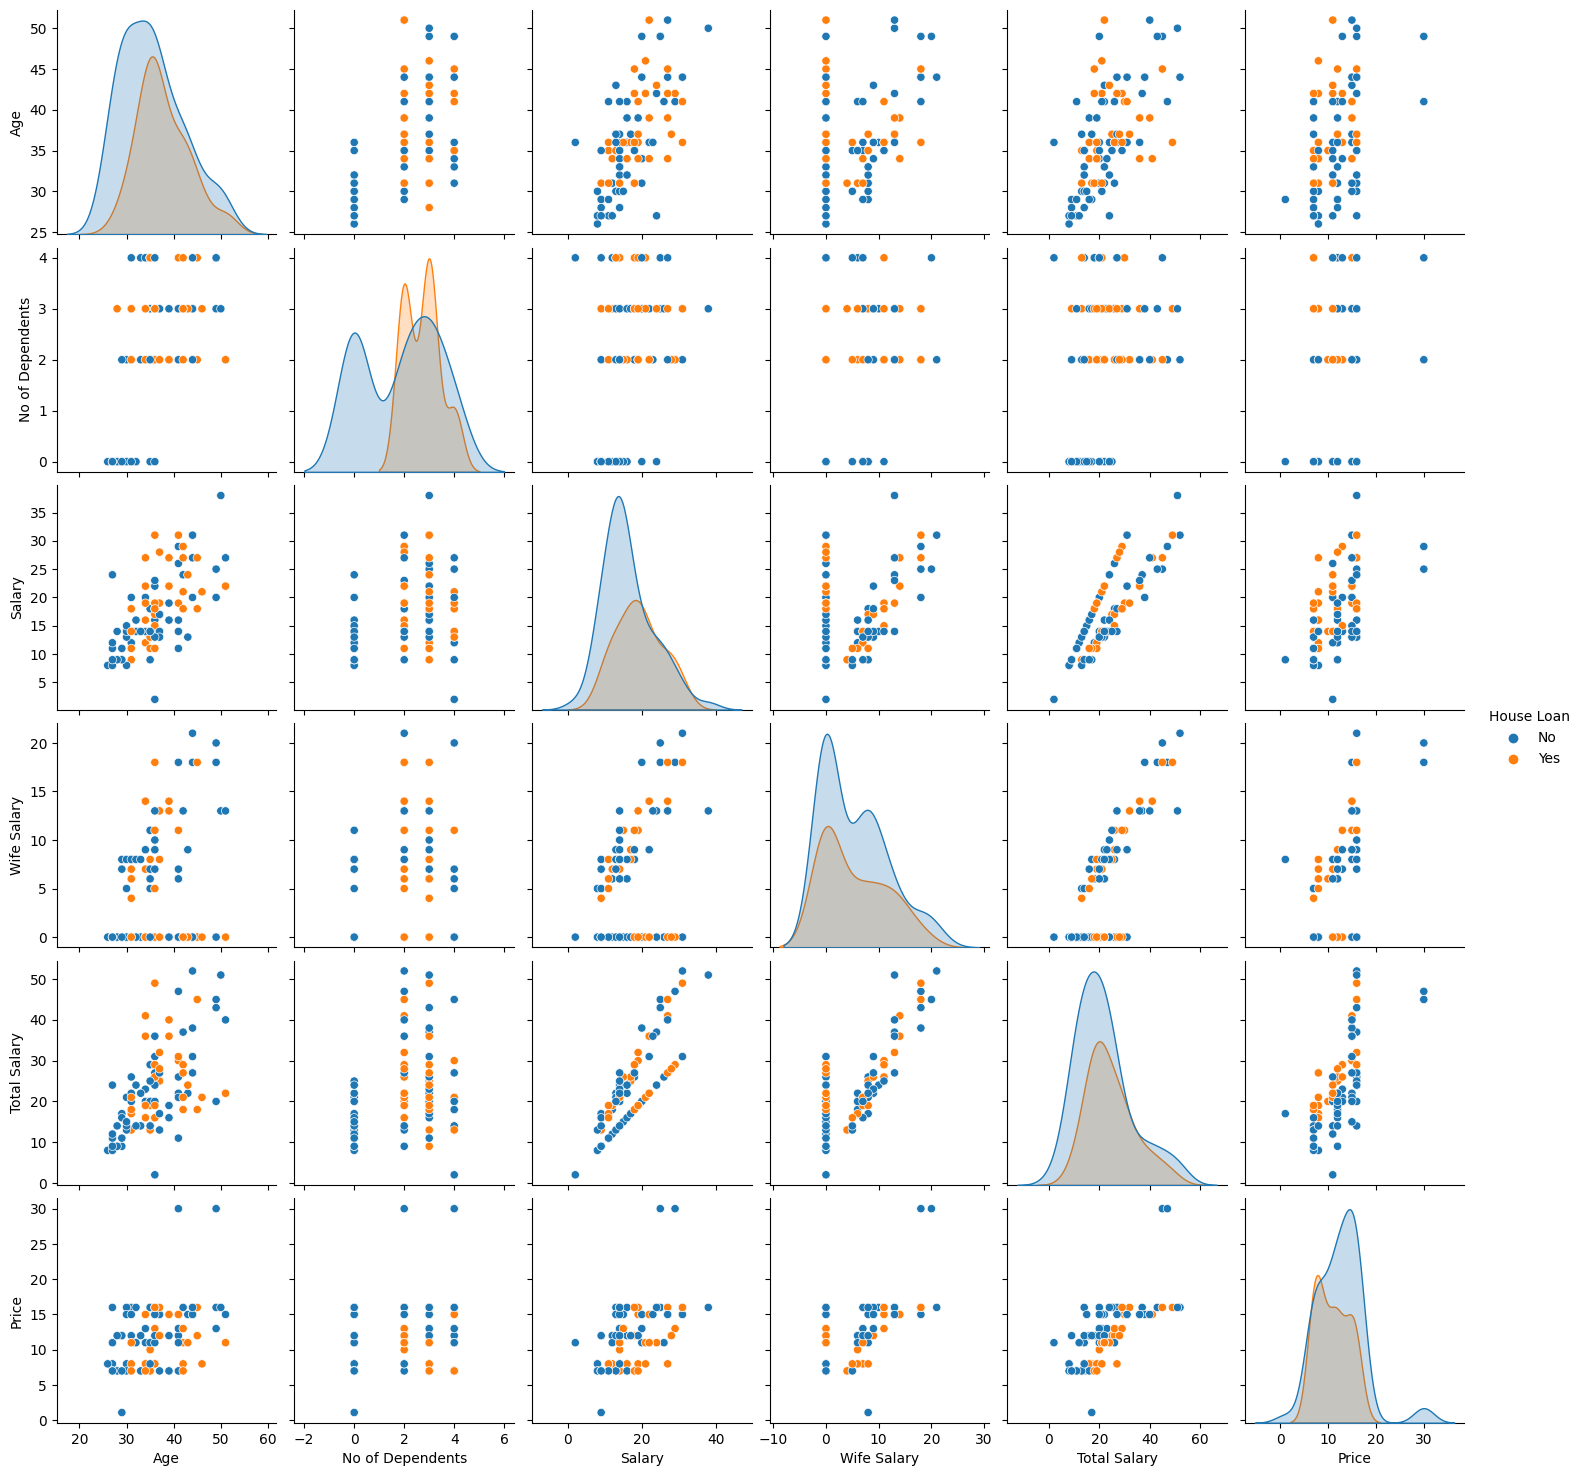

In [12]:
sns.pairplot(df ,hue='House Loan')

In [13]:
df['Profession'].value_counts()

Salaried    64
Business    35
Name: Profession, dtype: int64

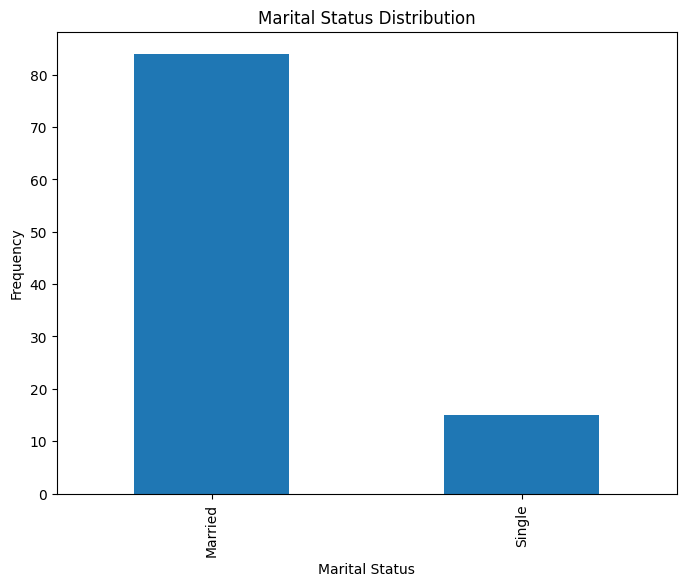

In [14]:

plt.figure(figsize=(8,6))
df['Marrital Status'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

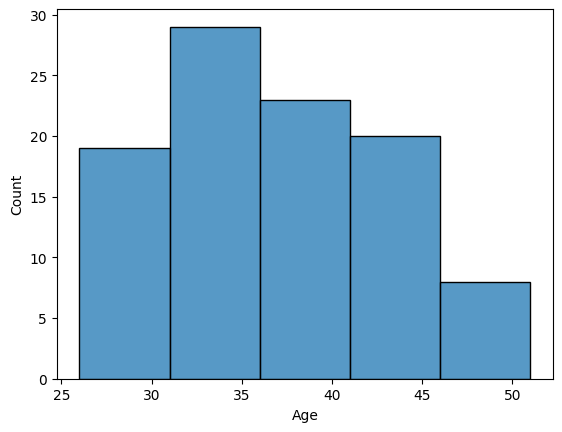

In [15]:
sns.histplot(df['Age'], bins=5)

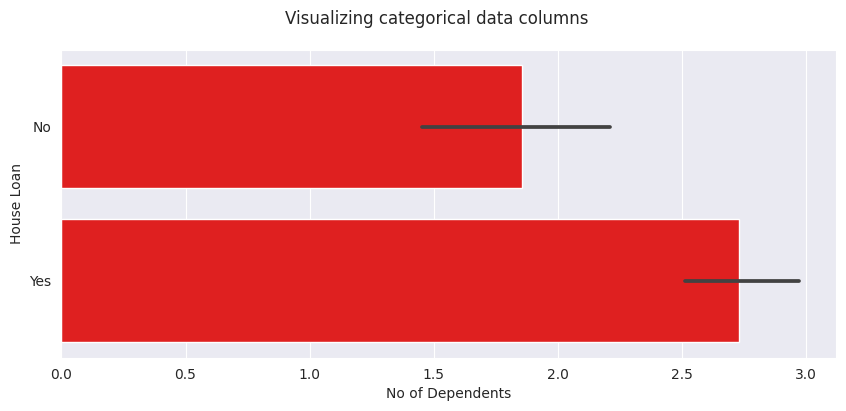

In [16]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))


sns.barplot(x='No of Dependents', y='House Loan', data=df, color='red')


fig.suptitle('Visualizing categorical data columns')
plt.show()

In [17]:
df.corr()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
Age,1.000000,0.543675,0.656442,0.288546,0.587082,0.376661
No of Dependents,0.543675,1.000000,0.273921,0.102010,0.234379,0.088822
Salary,0.656442,0.273921,1.000000,0.347934,0.841545,0.547630
Wife Salary,0.288546,0.102010,0.347934,1.000000,0.799238,0.635858
Total Salary,0.587082,0.234379,0.841545,0.799238,1.000000,0.717442
Price,0.376661,0.088822,0.547630,0.635858,0.717442,1.000000


In [18]:

features= df_raw[['Age', 'Profession', 'Marrital Status', 'No of Dependents', 'Total Salary' ,'Price' ,'Make']]

X = pd.get_dummies(features,drop_first=True)
# scaler = StandardScaler()
# X = scaler.fit_transform(X_dum)

Applying PCA

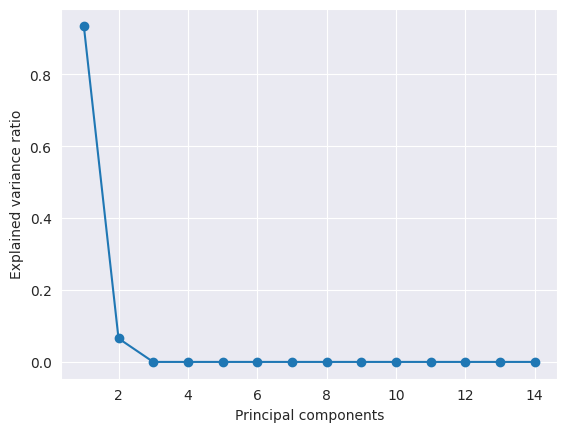

In [19]:
pca = PCA(random_state=42)
pca.fit(X)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()

In [20]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

Using the elbow method to find the optimal number clusters

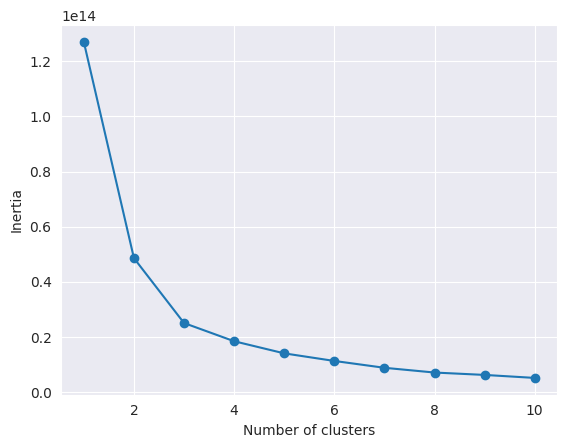

In [21]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Applying K means to the automobile datasets

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
df_raw['Cluster'] = kmeans.labels_
print(df_raw['Cluster'].value_counts())

1    43
2    41
0    15
Name: Cluster, dtype: int64


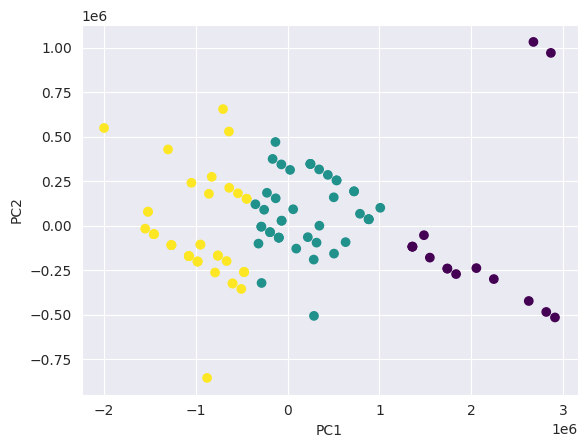

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X_pca[:, 0], X_pca[:, 1],c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

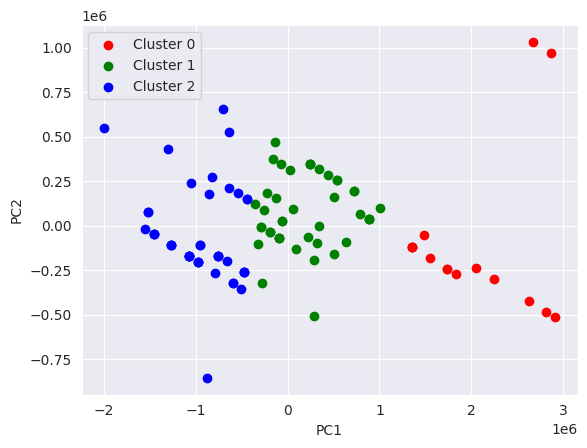

In [24]:
colors = {0: 'red', 1: 'green', 2: 'blue'}

fig, ax = plt.subplots()
for cluster_label, color in colors.items():
    mask = df_raw['Cluster'] == cluster_label
    X_cluster = X_pca[mask]
    ax.scatter(X_cluster[:, 0], X_cluster[:, 1], color=color, label=f'Cluster {cluster_label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.show()


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
input_var = df_raw[['Age','Make']]

In [27]:
x = pd.get_dummies(input_var, drop_first=True)
x.corr()

,Age,Make_Ciaz,Make_City,Make_Creata,Make_Duster,Make_Luxuray,Make_SUV,Make_Verna,Make_i20
Age,1.000000,0.095832,-0.124768,0.156810,0.189012,0.200720,0.086884,-0.076378,-0.168120
Make_Ciaz,0.095832,1.000000,-0.124490,-0.150725,-0.102444,-0.053329,-0.180993,-0.076208,-0.137931
Make_City,-0.124768,-0.124490,1.000000,-0.136038,-0.092461,-0.048132,-0.163357,-0.068782,-0.124490
Make_Creata,0.156810,-0.150725,-0.136038,1.000000,-0.111946,-0.058275,-0.197782,-0.083277,-0.150725
Make_Duster,0.189012,-0.102444,-0.092461,-0.111946,1.000000,-0.039608,-0.134427,-0.056601,-0.102444
Make_Luxuray,0.200720,-0.053329,-0.048132,-0.058275,-0.039608,1.000000,-0.069978,-0.029464,-0.053329
Make_SUV,0.086884,-0.180993,-0.163357,-0.197782,-0.134427,-0.069978,1.000000,-0.100000,-0.180993
Make_Verna,-0.076378,-0.076208,-0.068782,-0.083277,-0.056601,-0.029464,-0.100000,1.000000,-0.076208
Make_i20,-0.168120,-0.137931,-0.124490,-0.150725,-0.102444,-0.053329,-0.180993,-0.076208,1.000000


In [28]:
dep = x['Age']
ind = x.drop(['Age'], axis=1)

X_train, X_test , y_train , y_test = train_test_split(ind ,dep ,test_size=0.2 ,random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [30]:
model.score(X_train ,y_train)

0.22516654346738596

In [31]:
df_raw

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,2
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,1
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,2
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,1
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,1
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,0
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,1
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,0


In [32]:
input_var.Make.unique()

array(['i20', 'Ciaz', 'Duster', 'City', 'SUV', 'Baleno', 'Verna',
       'Luxuray', 'Creata'], dtype=object)

Text(0.5, 1.0, 'Age vs. Make')

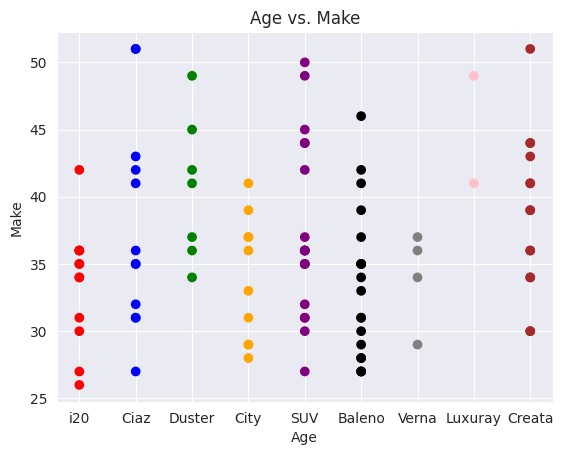

In [33]:
color_map = {'i20':'red', 'Ciaz':'blue', 'Duster':'green', 'City':'orange', 'SUV':'purple', 'Baleno': 'black', 'Verna': 'gray', 'Luxuray': 'pink', 'Creata': 'brown'}

colors = [color_map[m] for m in input_var['Make']]

plt.scatter( input_var['Make'],input_var['Age'], c=colors)

plt.xlabel('Age')
plt.ylabel('Make')
plt.title('Age vs. Make')


In [34]:
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(x)

input_var['Cluster'] = kmeans2.labels_

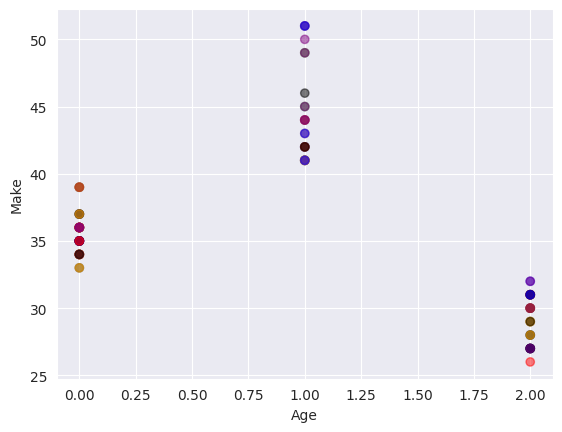

In [35]:
# plt.scatter(input_var['Age'], input_var['Make'], c=input_var['Make'].apply(lambda x: colors[x]), alpha=0.5)
plt.scatter(input_var['Cluster'],input_var['Age'], c=input_var['Make'].apply(lambda x: color_map[x]), alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Make')
plt.show()

In [36]:
input_var

,Age,Make,Cluster
0,27,i20,2
1,35,Ciaz,0
2,45,Duster,1
3,41,City,1
4,31,SUV,2
...,...,...,...
94,27,SUV,2
95,50,SUV,1
96,51,Ciaz,1
97,51,Creata,1
